In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
a_font = {'fontname': 'Arial'}

# Raman spectra

In [6]:
RamanMoS2 = pd.read_table('raman_mos2.txt')

In [7]:
RamanWS2 = pd.read_table('raman_ws2.txt')

In [5]:
RamanMoS2

,raman_shift,intensity
0,-18.859688,6
1,-17.737869,9
2,-16.616169,10
3,-15.494590,8
4,-14.373129,8
...,...,...
1019,1056.259200,107
1020,1057.250200,102
1021,1058.243500,106
1022,1059.233200,103


In [8]:
RamanMoS2.raman_shift

0        -18.859688
1        -17.737869
2        -16.616169
3        -15.494590
4        -14.373129
           ...     
1019    1056.259200
1020    1057.250200
1021    1058.243500
1022    1059.233200
1023    1060.226400
Name: raman_shift, Length: 1024, dtype: float64

In [7]:
max(RamanMoS2.raman_shift)

1060.2264

In [8]:
max(RamanWS2.raman_shift)

1058.2435

In [9]:
RamanWS2

,raman_shift,intensity
0,-21.103680,194
1,-19.981625,195
2,-18.859688,197
3,-17.737869,197
4,-16.616169,196
...,...,...
1019,1054.273100,203
1020,1055.266800,205
1021,1056.259200,204
1022,1057.250200,206


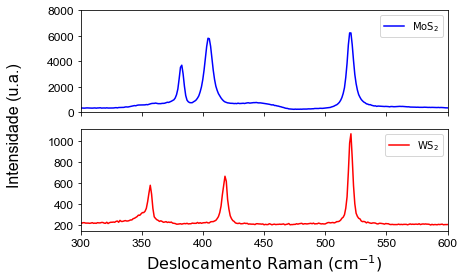

In [10]:
fig1,(ax1, ax2) = plt.subplots(2,1, sharex=True)
plt.xlabel('Deslocamento Raman (cm$^{-1}$)', fontsize=16)
ax1.plot(RamanMoS2.raman_shift, RamanMoS2.intensity, 'b', label='MoS$_2$')
ax1.set_ylim(0,8000)
ax1.set_yticklabels(np.arange(0,10000,2000), **a_font, fontsize=12)
ax1.legend()
ax2.plot(RamanWS2.raman_shift, RamanWS2.intensity, 'r', label='WS$_2$')
ax2.legend()
ax2.set_xlim(300,600)
ax2.set_xticklabels(np.arange(300,610,50), **a_font, fontsize=12)
ax2.set_yticklabels(np.arange(0,1100,200), **a_font, fontsize=12)
fig1.text(-0.05,0.55,"Intensidade (u.a.)", ha="center", va="center", rotation=90, **a_font, fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
fig1.savefig('Raman_both.png',dpi=300, bbox_inches='tight')

In [12]:
max(RamanMoS2.intensity)

6234

# PL Spectra

In [10]:
pl1 = pd.read_table('pl_mos2.txt')
pl2 = pd.read_table('pl_ws2.txt')

In [14]:
pl1

,wavelength,intensity
0,496.04590,369
1,496.37759,353
2,496.70929,353
3,497.04089,347
4,497.37259,317
...,...,...
1019,834.40778,212
1020,834.74011,212
1021,835.07239,215
1022,835.40472,212


In [11]:
pl1['energy'] = 1239.8/pl1['wavelength'] # energy in eV

In [16]:
pl1

,wavelength,intensity,energy
0,496.04590,369,2.499365
1,496.37759,353,2.497695
2,496.70929,353,2.496027
3,497.04089,347,2.494362
4,497.37259,317,2.492699
...,...,...,...
1019,834.40778,212,1.485844
1020,834.74011,212,1.485253
1021,835.07239,215,1.484662
1022,835.40472,212,1.484071


In [12]:
pl2['energy'] = 1239.8/pl2['wavelength']

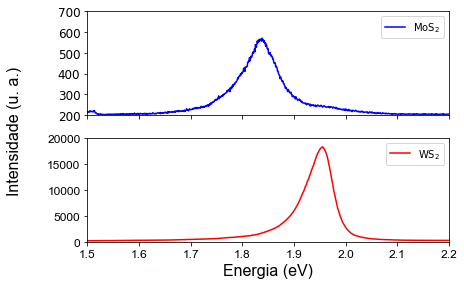

In [18]:
fig2,(ax1, ax2) = plt.subplots(2,1, sharex=True)
plt.xlabel('Energia (eV)', **a_font, fontsize=16)
ax1.plot(pl1.energy, pl1.intensity, 'b', label='MoS$_2$')
ax1.set_ylim(200,700)
ax1.set_yticklabels(np.arange(200,800,100), fontsize=12)
ax1.legend()
ax2.plot(pl2.energy, pl2.intensity, 'r', label='WS$_2$')
ax2.legend()
ax2.set_xlim(1.5,2.2)
ax2.set_ylim(0, 20000)
ax2.set_xticks(np.arange(1.5,2.2,0.1))
ax2.set_xticklabels(["1.5", "1.6", "1.7", "1.8", "1.9", "2.0", "2.1", "2.2"], **a_font, fontsize=12)
ax2.set_yticklabels(np.arange(0,25000,5000), **a_font, fontsize=12)
fig2.text(-0.05,0.55,"Intensidade (u. a.)", ha="center", va="center", rotation=90, **a_font, fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
fig2.savefig('PL Both.png', dpi=300, bbox_incehs='tight')

# Plot all

In [13]:
RamanMoS2['normalized_intens'] = RamanMoS2['intensity']/max(RamanMoS2.intensity)
RamanWS2['normalized_intens'] = RamanWS2['intensity']/max(RamanWS2.intensity)
pl1['normalized_intens'] = pl1['intensity']/max(pl1.intensity)
pl2['normalized_intens'] = pl2['intensity']/max(pl2.intensity)

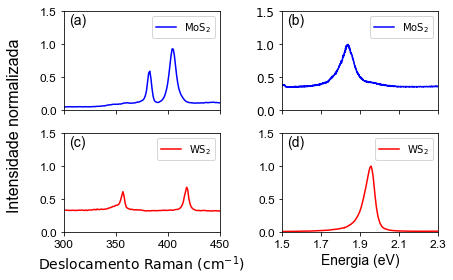

In [15]:
fig3, axs = plt.subplots(2,2,sharex='col')
axs[0,0].plot(RamanMoS2.raman_shift, RamanMoS2.normalized_intens, 'b', label='MoS$_2$')
axs[0,0].set_ylim(0,1.5)
axs[0,0].set_yticklabels(np.arange(0,2.0, 0.5), **a_font, fontsize=12)
axs[0,0].text(305,1.3,"(a)", **a_font, fontsize=14)
axs[0,0].legend(loc=1)
axs[0,1].plot(pl1.energy, pl1.normalized_intens, 'b', label='MoS$_2$')
axs[0,1].set_ylim(0,1.5)
axs[0,1].set_yticks(np.arange(0,2.0,0.5))
axs[0,1].set_yticklabels(np.arange(0,2.0,0.5), fontsize=12)
axs[0,1].text(1.525,1.3,"(b)", **a_font, fontsize=14)
axs[0,1].legend(loc=1)
axs[1,0].plot(RamanWS2.raman_shift, RamanWS2.normalized_intens, 'r', label='WS$_2$')
axs[1,0].text(305,1.3,"(c)", **a_font, fontsize=14)
axs[1,0].legend(loc=1)
axs[1,0].set_xlim(300,450)
axs[1,0].set_xticklabels(np.arange(300,460,50), **a_font, fontsize=12)
axs[1,0].set_ylim(0,1.5)
axs[1,0].set_yticklabels(np.arange(0,2.0,0.5), **a_font, fontsize=12)
axs[1,0].set_xlabel('Deslocamento Raman (cm$^{-1}$)', fontsize=14)
axs[1,1].plot(pl2.energy, pl2.normalized_intens, 'r', label='WS$_2$')
axs[1,1].legend(loc=1)
axs[1,1].set_xlim(1.5,2.3)
axs[1,1].set_ylim(0, 1.5)
axs[1,1].set_xticks(np.arange(1.5,2.4,0.2))
axs[1,1].set_xticklabels(["1.5", "1.7", "1.9", "2.1", "2.3"], **a_font, fontsize=12)
axs[1,1].set_yticks(np.arange(0,2.0,0.5))
axs[1,1].set_yticklabels(np.arange(0,2.0,0.5), **a_font, fontsize=12)
axs[1,1].set_xlabel('Energia (eV)', **a_font, fontsize=14)
axs[1,1].text(1.525,1.3,"(d)", **a_font, fontsize=14)
fig3.text(-0.025,0.55,"Intensidade normalizada", ha="center", va="center", rotation=90, **a_font, fontsize=16)
fig3.align_labels()
plt.tight_layout()
plt.show()

In [27]:
fig3.savefig('Raman and PL for both.png',dpi=300,bbox_inches='tight')